<a href="https://colab.research.google.com/github/Fresno777/PandasGUI/blob/master/example_Yang_et_al_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to illustrate how to use WQChartPy

This Colab notebook was created to illustrated how to use WQChartPy by using the example geochemical dataset taken from Yang et al. (2020). This dataset contains a total of 1,184 groundwater samples. Yang et al. (2020) used this dataset to to reveal spatio-temporal patterns and controlling factors of groundwater geochemistry in Jianghan Plain, China.

In [ ]:
! pip install wqchartpy

     |████████████████████████████████| 21.7 MB 1.5 MB/s 
     |████████████████████████████████| 11.2 MB 57.5 MB/s 
     |████████████████████████████████| 895 kB 38.8 MB/s 
  Created wheel for wqchartpy: filename=wqchartpy-0.1.8-py3-none-any.whl size=46183 sha256=e22c4cb8d164fc999f26651e79a8bb9716e69ad25fdb11c75850cd446f7d53e9
  Stored in directory: /root/.cache/pip/wheels/ed/fb/32/230bfcb14b268c43c85ab8718ed0b57f7c87a70fb254905b1a
Successfully built wqchartpy
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Set data path

In [ ]:
# Set the data path
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = '/content/drive/MyDrive/Colab Notebooks/WQChartPy_examples/data/'

Mounted at /content/drive


## Import modules

In [ ]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

## Load data

In [ ]:
# Load the template data
raw_df = pd.read_csv(data_path + 'data_Yang_et_al_2020.csv')

In [ ]:
# Show the number of water samples
print('Totla number of samples: %d' %len(raw_df))

Totla number of samples: 1184


In [ ]:
# Show the first five rows
raw_df.head(5)

,Well,X,Y,Sampling year,Sampling season,pH,Ca,Mg,K,Na,Cl,SO4,HCO3,Fe,F,NH4
0,J1,592509.17,3397087.46,1992,dry,6.9,62.7,13.0,0.9,14.9,12.5,10,257.5,0.05,0.16,n.d.
1,J1,592509.17,3397087.46,1992,wet,7.1,68.4,14.5,0.6,13.0,13.8,22.5,277.5,0.08,0.2,n.d.
2,J1,592509.17,3397087.46,1993,dry,6.9,74.2,13.0,0.7,13.1,13.8,10,287.5,0.1,0.28,0.04
3,J1,592509.17,3397087.46,1993,wet,7.9,68.4,14.5,1.3,13.0,12.5,5,280.0,0.08,0.2,n.d.
4,J1,592509.17,3397087.46,1994,dry,7.1,66.8,13.0,0.6,12.7,13.8,7.5,272.5,0.7,0.16,n.d.


One may note that this dataset is the raw data. We will perform the Clustering analysis by following Yang et al. (2020) first and show below how to process the raw data and the use WQChartPy to display the samples.

## Clustering the data using HCA¶

### Data preprocessing

In [ ]:
# Step 1 : Feature selection
pars = ['pH', 'Ca', 'Mg', 'K', 'Na', 'Cl', 'SO4', 'HCO3', 'Fe', 'F', 'NH4']
X_df = raw_df[pars]

# Step 2 : Substitution of censored values
X_df = X_df.replace('n.d.', 0.0075)

# Step 3 : Screening the non-measurement values
X_df = X_df.replace(-9999, np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X = np.log(np.float64(X_df.values))

# Step 5 : Standardization 
rescaledX = StandardScaler().fit_transform(X)

In [ ]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 1184 
Number of variables: 11


In [ ]:
# Get sample ID
Y_df = pd.read_csv(data_path + 'data_Yang_et_al_2020.csv', header=0)[['Well', 'pH', 'Ca', 'Mg', 'K', 'Na', 'Cl', 'SO4', 'HCO3', 'Fe', 'F', 'NH4']].replace('n.d.', 0.0075)

### Clustering the geochemical data by using HCA

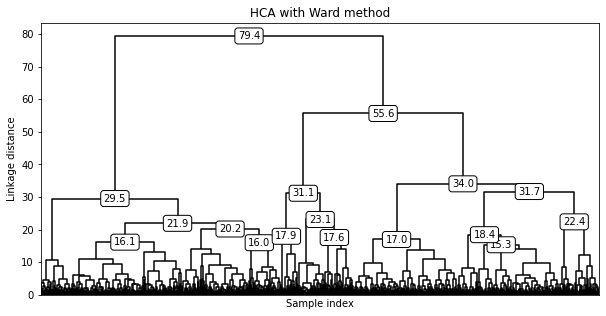

In [ ]:
# Use ward method
Z = hierarchy.linkage(rescaledX, method='ward', metric='euclidean')

# Customize the colors of the clusters
colors=['black']
hierarchy.set_link_color_palette(colors)

# plot the dendrogram
plt.figure(figsize=(10, 5))
ddata = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=0, color_threshold=80)

plt.title('HCA with Ward method')
plt.xlabel('Sample index')
plt.ylabel('Linkage distance')
plt.xticks([])

# Label the linkage distance
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 15:
        # plt.plot(x, y, 'o', c='black')
        plt.text(x, y, '%.1f' %y,
                 fontsize=10,
                 ha="center", va="center",
                 bbox=dict(boxstyle="round", ec='black', fc='white'))
plt.show()

hierarchy.set_link_color_palette(None)

In [ ]:
# Group the data into seven clusters
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
y_seven = cluster.fit_predict(rescaledX) 

In [ ]:
# Save the clustering results
Y_df['SCI'] = y_seven

# Show Y_df
Y_df

,Well,pH,Ca,Mg,K,Na,Cl,SO4,HCO3,Fe,F,NH4,SCI
0,J1,6.90,62.70,13.00,0.90,14.90,12.50,10,257.50,0.05,0.16,0.0075,2
1,J1,7.10,68.40,14.50,0.60,13.00,13.80,22.5,277.50,0.08,0.2,0.0075,2
2,J1,6.90,74.20,13.00,0.70,13.10,13.80,10,287.50,0.1,0.28,0.04,2
3,J1,7.90,68.40,14.50,1.30,13.00,12.50,5,280.00,0.08,0.2,0.0075,2
4,J1,7.10,66.80,13.00,0.60,12.70,13.80,7.5,272.50,0.7,0.16,0.0075,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,J9,7.73,122.96,35.40,3.77,35.20,62.85,100,437.63,5.84,0.08,0.0075,0
1180,J9,7.50,131.60,40.96,3.53,29.14,64.38,55,535.47,2.36,0.1,0.93,0
1181,J9,7.90,95.57,33.26,3.61,31.98,55.98,55,390.17,6.12,0.1,0.0075,0
1182,J9,7.50,135.59,26.12,5.26,50.94,55.61,172.69,374.54,0.0075,0.12,0.23,0


### Organize the data into WQChartPy required formats

In [ ]:
format_df = pd.DataFrame()

format_df['Sample'] = Y_df['Well']
format_df['Label'] = 'C' + (Y_df['SCI'] + 1).map(str)

format_df.loc[y_seven==0, 'Color'] = '#808000'; format_df.loc[y_seven==0, 'Marker'] = 's'
format_df.loc[y_seven==1, 'Color'] = '#008080'; format_df.loc[y_seven==1, 'Marker'] = '^'
format_df.loc[y_seven==2, 'Color'] = '#3cb44b'; format_df.loc[y_seven==2, 'Marker'] = 'o'
format_df.loc[y_seven==3, 'Color'] = '#0082c8'; format_df.loc[y_seven==3, 'Marker'] = 's'
format_df.loc[y_seven==4, 'Color'] = '#FA8072'; format_df.loc[y_seven==4, 'Marker'] = '^'
format_df.loc[y_seven==5, 'Color'] = '#911eb4'; format_df.loc[y_seven==5, 'Marker'] = 'o'
format_df.loc[y_seven==6, 'Color'] = '#e6194b'; format_df.loc[y_seven==6, 'Marker'] = 'D'

format_df['Size'] = 20
format_df['Alpha'] = 0.6

format_df['pH'] = Y_df['pH']
format_df['Ca'] = Y_df['Ca']
format_df['Mg'] = Y_df['Mg']
format_df['Na'] = Y_df['Na']              
format_df['K'] = Y_df['K']   
format_df['HCO3'] = Y_df['HCO3']
format_df['CO3'] = 0
format_df['Cl'] = Y_df['Cl']
format_df['SO4'] = Y_df['SO4'].values


# Reset the index
format_df['SO4'] = pd.to_numeric(format_df['SO4'], errors='coerce')

format_df.reset_index(inplace=True, drop=True)

# Show the df
format_df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,J1,C3,#3cb44b,o,20,0.6,6.90,62.70,13.00,14.90,0.90,257.50,0,12.50,10.00
1,J1,C3,#3cb44b,o,20,0.6,7.10,68.40,14.50,13.00,0.60,277.50,0,13.80,22.50
2,J1,C3,#3cb44b,o,20,0.6,6.90,74.20,13.00,13.10,0.70,287.50,0,13.80,10.00
3,J1,C3,#3cb44b,o,20,0.6,7.90,68.40,14.50,13.00,1.30,280.00,0,12.50,5.00
4,J1,C3,#3cb44b,o,20,0.6,7.10,66.80,13.00,12.70,0.60,272.50,0,13.80,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,J9,C1,#808000,s,20,0.6,7.73,122.96,35.40,35.20,3.77,437.63,0,62.85,100.00
1180,J9,C1,#808000,s,20,0.6,7.50,131.60,40.96,29.14,3.53,535.47,0,64.38,55.00
1181,J9,C1,#808000,s,20,0.6,7.90,95.57,33.26,31.98,3.61,390.17,0,55.98,55.00
1182,J9,C1,#808000,s,20,0.6,7.50,135.59,26.12,50.94,5.26,374.54,0,55.61,172.69


Trilinear Piper plot created. Saving it to /content 



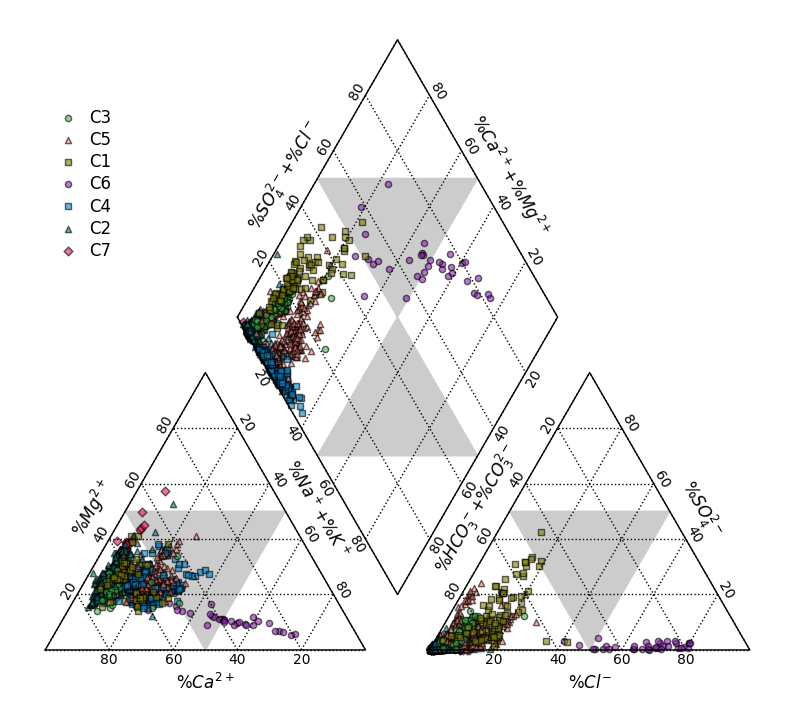

In [ ]:
# Import WQChartPy
from wqchartpy import triangle_piper

# Draw the diagram
triangle_piper.plot(format_df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')